# Task 3 -- Desicion Tree 

Objective : Create the decision tree classifier and visualize it graphically

In [2]:
# import library
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as mpt

# Dataset Details

In [3]:
# import in data

iris= pd.read_csv("D:\\SparkFoundation\\Task3\\Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.shape

(150, 6)

In [5]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
iris= iris.drop(["Id"],axis=1)
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
iris.describe() # data summary

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

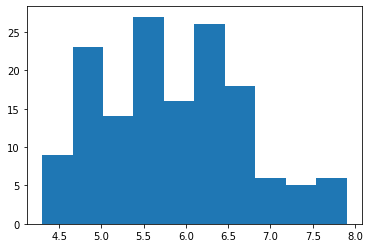

In [8]:
# Sepal length

mpt.hist(iris.SepalLengthCm)

{'whiskers': [<matplotlib.lines.Line2D at 0x18d1c6e8490>,
 'caps': [<matplotlib.lines.Line2D at 0x18d1c6e8b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d1c6e8130>],
 'medians': [<matplotlib.lines.Line2D at 0x18d1c6f4250>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d1c6f4550>],
 'means': []}

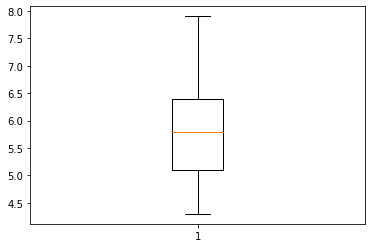

In [9]:
 mpt.boxplot(iris.SepalLengthCm)

In [10]:
iris.SepalLengthCm.skew()

0.3149109566369728

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

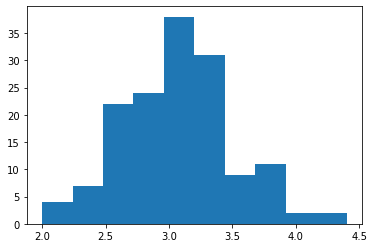

In [11]:
# Sepal Width

mpt.hist(iris.SepalWidthCm)

{'whiskers': [<matplotlib.lines.Line2D at 0x18d1c7ba880>,
 'caps': [<matplotlib.lines.Line2D at 0x18d1c7baf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d1c7ba520>],
 'medians': [<matplotlib.lines.Line2D at 0x18d1c7c4640>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d1c7c4940>],
 'means': []}

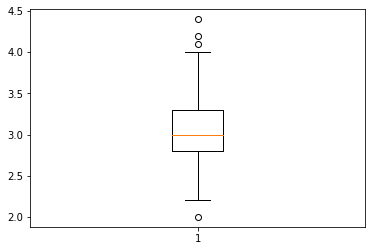

In [12]:
mpt.boxplot(iris.SepalWidthCm)

In [13]:
iris.SepalWidthCm.skew()

0.3340526621720866

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

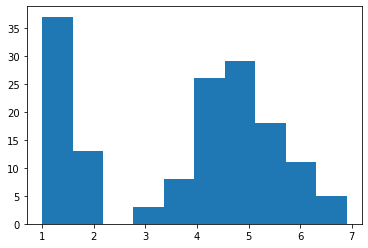

In [14]:
# Petal Length

mpt.hist(iris.PetalLengthCm)

{'whiskers': [<matplotlib.lines.Line2D at 0x18d1c889040>,
 'caps': [<matplotlib.lines.Line2D at 0x18d1c889700>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d1c87cca0>],
 'medians': [<matplotlib.lines.Line2D at 0x18d1c889dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d1c895100>],
 'means': []}

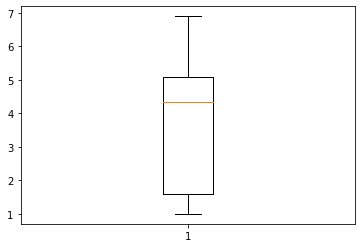

In [15]:

mpt.boxplot(iris.PetalLengthCm)

In [16]:
iris.PetalLengthCm.skew()

-0.27446425247378287

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

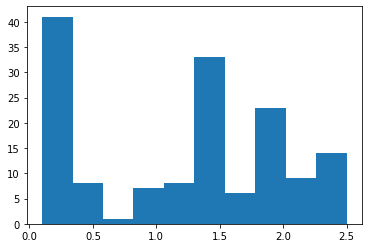

In [17]:
# Petal Width

mpt.hist(iris.PetalWidthCm)

{'whiskers': [<matplotlib.lines.Line2D at 0x18d1c94cd00>,
 'caps': [<matplotlib.lines.Line2D at 0x18d1c95b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d1c94c9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x18d1c95bac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d1c95bdc0>],
 'means': []}

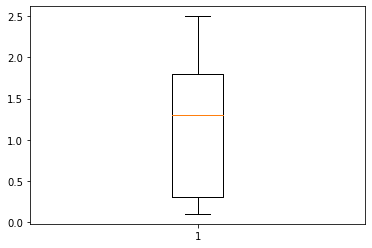

In [18]:
mpt.boxplot(iris.PetalWidthCm)

In [19]:
iris.PetalWidthCm.skew()

-0.10499656214412734

(<matplotlib.axes._subplots.AxesSubplot at 0x18d1c97b550>,
 Iris-versicolor    50
 Iris-virginica     50
 Iris-setosa        50
 Name: Species, dtype: int64)

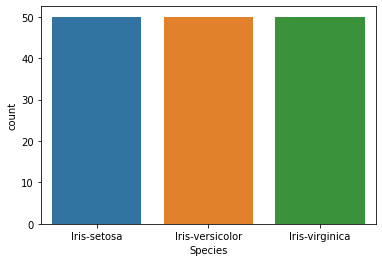

In [20]:
# Species
sns.countplot("Species", data=iris), iris.Species.value_counts() # Each category consits equal number of data

In [21]:
# Analysis of missing values

iris.isna().sum() # There is no missing values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
# Input valriables 

X = iris.drop(["Species"], axis=1)

# Output Variable

y= iris["Species"]

X.shape, y.shape


((150, 4), (150,))

In [23]:
X_df = pd.DataFrame(X, columns= ["SepalLength","SepalWidth","PetalLength","PetalWidth"] )
X_df.columns.values

array(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'],
      dtype=object)

In [24]:
iris_feature_names  = list(X_df.columns.values)
iris_feature_names

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [25]:
y_df = pd.DataFrame(y, columns= ["Species"] )
y_df.columns.values

array(['Species'], dtype=object)

In [26]:
iris_target= list(y_df.columns.values)
iris_target

['Species']

In [27]:
labels = y_df['Species'].unique()
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Model Building


In [28]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier


In [29]:
iris.iloc[:,:4]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
model_dt =  DecisionTreeClassifier(random_state=1234)
model_dt = model_dt.fit(X,y)
model_dt

DecisionTreeClassifier(random_state=1234)

In [31]:
print("Depth of the decision ",model_dt.get_depth() )

Depth of the decision  5


In [32]:
# Predict Y 
predicted_value = model_dt.predict(X)
predicted_value

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

# Model Evaluation

In [33]:

# Accuracy Score
from sklearn.metrics import accuracy_score
Accuracy_dt = accuracy_score(y, predicted_value)
Accuracy_dt

1.0

# Visualization

In [34]:
from sklearn import tree

In [35]:
 # Text Represention
    
txt_representation = tree.export_text(model_dt)
txt_representation

'|--- feature_2 <= 2.45\n|   |--- class: Iris-setosa\n|--- feature_2 >  2.45\n|   |--- feature_3 <= 1.75\n|   |   |--- feature_2 <= 4.95\n|   |   |   |--- feature_3 <= 1.65\n|   |   |   |   |--- class: Iris-versicolor\n|   |   |   |--- feature_3 >  1.65\n|   |   |   |   |--- class: Iris-virginica\n|   |   |--- feature_2 >  4.95\n|   |   |   |--- feature_3 <= 1.55\n|   |   |   |   |--- class: Iris-virginica\n|   |   |   |--- feature_3 >  1.55\n|   |   |   |   |--- feature_0 <= 6.95\n|   |   |   |   |   |--- class: Iris-versicolor\n|   |   |   |   |--- feature_0 >  6.95\n|   |   |   |   |   |--- class: Iris-virginica\n|   |--- feature_3 >  1.75\n|   |   |--- feature_2 <= 4.85\n|   |   |   |--- feature_1 <= 3.10\n|   |   |   |   |--- class: Iris-virginica\n|   |   |   |--- feature_1 >  3.10\n|   |   |   |   |--- class: Iris-versicolor\n|   |   |--- feature_2 >  4.85\n|   |   |   |--- class: Iris-virginica\n'

[Text(558.0, 747.4499999999999, 'PetalLength <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Iris-setosa'),
 Text(472.15384615384613, 611.55, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Iris-setosa'),
 Text(643.8461538461538, 611.55, 'PetalWidth <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Iris-versicolor'),
 Text(343.38461538461536, 475.65, 'PetalLength <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Iris-versicolor'),
 Text(171.69230769230768, 339.74999999999994, 'PetalWidth <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Iris-versicolor'),
 Text(85.84615384615384, 203.8499999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Iris-versicolor'),
 Text(257.53846153846155, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(515.0769230769231, 339.74999999999994, 'PetalWidth <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-virgini

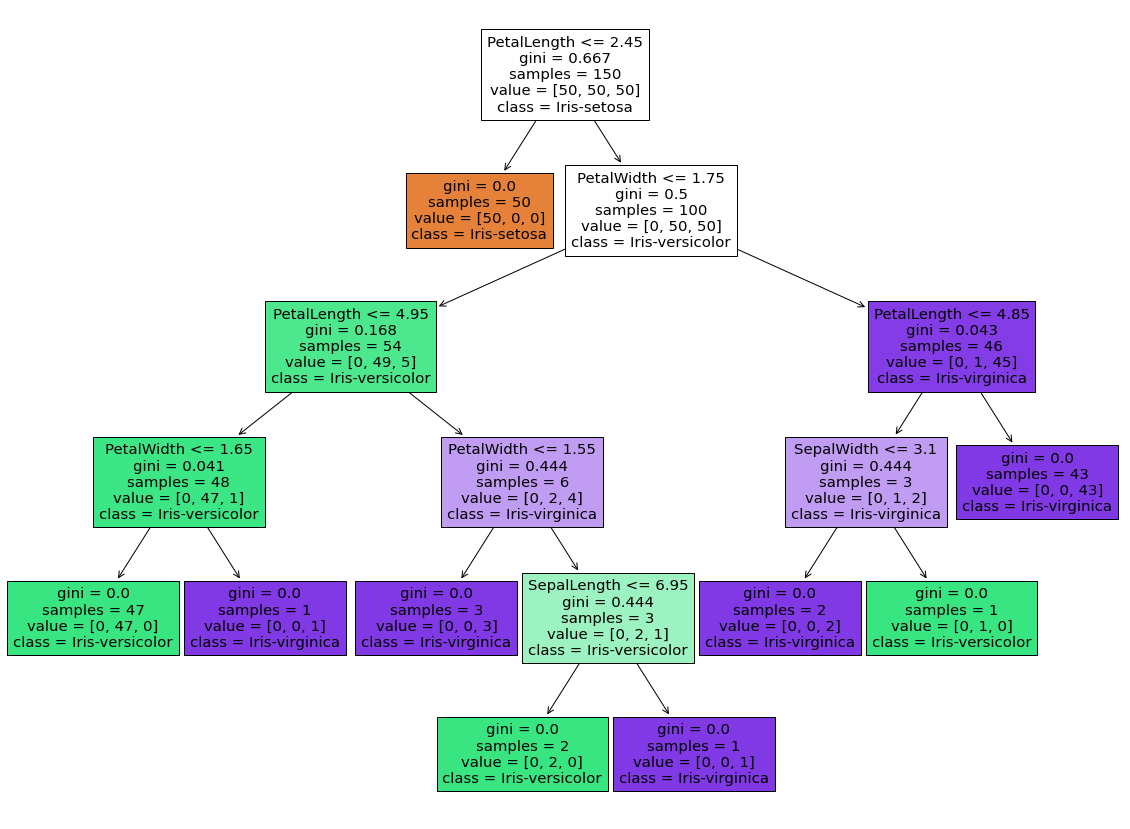

In [68]:
fig = mpt.figure(figsize=(20,15))
iris_dt_visulize = tree.plot_tree(model_dt,
                                  feature_names= iris_feature_names,  
                                  class_names= labels,
                   filled=True)
                  
iris_dt_visulize
 
